In [0]:
# LOAD THE NECESSSARY LIBRARIES FOR THE PROJECT

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.utils import to_categorical # distribute multiple classes in a binary matrix
import matplotlib.pyplot as plt # plot images or graphs
%matplotlib inline



In [0]:
# LOAD THE DATA FROM MNIST ONLINE DATASET

from keras.datasets import fashion_mnist # load the proprietary dataset

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data() # split the dataset into train/test by default 

In [11]:
# HAVE A BETTER INTUITION ABOUT THE DATA IN HAND

print('Training data shape : ', train_X.shape, train_Y.shape) #shape of the training data 
print('Testing data shape : ', test_X.shape, test_Y.shape)  #shape of the test data 

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


*From the above output, you can see that the training data has a shape of 60000 x 28 x 28 since there are 60,000 training samples each of 28 x 28 dimension. Similarly, the test data has a shape of 10000 x 28 x 28 since there are 10,000 testing samples.*

In [13]:
# HAVE A LOOK AT DIFFRENT POSSIBLE OUTPUTS OF THE LABELED DATASET 

classes = np.unique(train_Y) # the number of possible labels
nClasses = len(classes) # the number of exemples in each possible labes
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

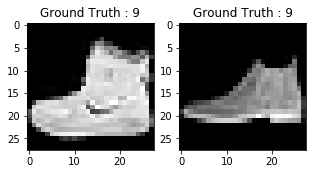

In [17]:
# PLOT THE FIRST IMAGE OF EACH SET :

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

#                      - Data Preprocessing


In [0]:
# SET A NEW DIMENSIONS FOR THE DATASET 
img_rows, img_cols = 28, 28 # each image of dataset is a 28 by 28 pixel
input_shape = (img_rows, img_cols, 1) # add an extra dimension to contain the label of each given exemple

In [0]:
train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1) # reshape the training set into the new matrix format 
test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1) # reshape the test set into the new matrix format 

train_X.shape, test_X.shape # print the new train/test shapes

In [0]:
train_X = train_X.astype('float32') # convert the training set into a float32 type 
test_X = test_X.astype('float32')  # convert the test set into a float32 type 

# IMAGES ARE CODED ON 8 BITS SO 255 LEVEL OF GRAY , THEREFORE WE APPLY NORMALIZATION TO HAVE SMALL NUMBERS BETWEEN 0 AND 1 

train_X /= 255 # normalize the training set 
test_X /= 255 # normalize the test set 


# - features engineering 

in this section , we will make use of the to_categorical method of keras where we will convert the class labels into a one-hot encoding vector